In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

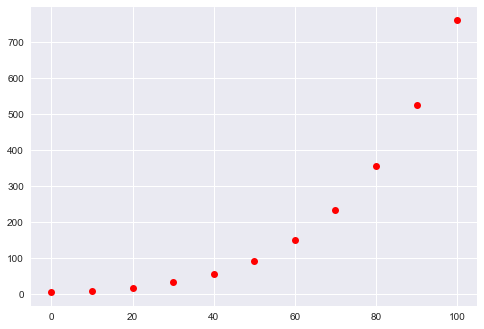

[  4.51906208  16.90477575 229.84844011]


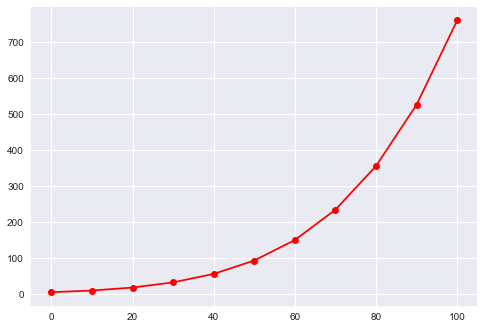

In [7]:
t,I = np.loadtxt('water_vapor_pressure_C_vs_torr.csv', delimiter=',', unpack = True)
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(t,I,'ro')
plt.show()

def mismatch(p):
    a,b,c = p
    f = lambda x: a*np.exp(b*x/(x+c))
    Icalc = f(t)
    d = I- Icalc
    return (d*d).sum()
p0 = 1,10,100
res = minimize(mismatch, p0, method='BFGS')
print(res.x)

a,b,c = res.x
f = lambda x: a*np.exp(b*x/(x+c))
fig, ax = plt.subplots()
ax.plot(t,I,'ro',t,f(t), 'r-')
plt.show()